In [43]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split


In [44]:
SkyrimWeaponData = pd.read_csv('../data/CleanSkyrimData.csv')

In [45]:
X = SkyrimWeaponData.copy()
y = SkyrimWeaponData.pop('Gold')

In [46]:
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [289]


/home/mohit/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:
model = tf.keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(256, activation='relu'),  
    layers.Dense(1),
])

In [79]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [80]:
history = model.fit(
    X, y,
    batch_size=8,
    epochs=150,
)

Epoch 1/150
33/33 [==============================] - 1s 3ms/step - loss: 2.3479
Epoch 2/150
33/33 [==============================] - 0s 3ms/step - loss: 0.8279
Epoch 3/150
33/33 [==============================] - 0s 3ms/step - loss: 0.6699
Epoch 4/150
33/33 [==============================] - 0s 3ms/step - loss: 0.4758
Epoch 5/150
33/33 [==============================] - 0s 3ms/step - loss: 0.3675
Epoch 6/150
33/33 [==============================] - 0s 3ms/step - loss: 0.3165
Epoch 7/150
33/33 [==============================] - 0s 3ms/step - loss: 0.3229
Epoch 8/150
33/33 [==============================] - 0s 3ms/step - loss: 0.3372
Epoch 9/150
33/33 [==============================] - 0s 3ms/step - loss: 0.3165
Epoch 10/150
33/33 [==============================] - 0s 3ms/step - loss: 0.3051
Epoch 11/150
33/33 [==============================] - 0s 3ms/step - loss: 0.2582
Epoch 12/150
33/33 [==============================] - 0s 3ms/step - loss: 0.3107
Epoch 13/150
33/33 [=================

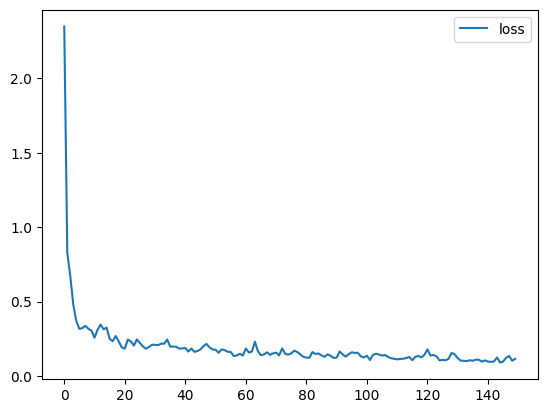

In [81]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot();